In [131]:
import os
from nltk.corpus import stopwords
from nltk import word_tokenize
from string import punctuation
import random


In [132]:
s=str.maketrans('','',punctuation)
a='salam!@'
a.translate(s)

'salam'

In [133]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LOQ\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [134]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LOQ\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\LOQ\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [135]:
stop_word=stopwords.words('english')

In [136]:
negaitve_d=[]
max_len_negaitve=0
for file in os.listdir('data/neg'):
    with open('data/neg/'+file) as f:
        txt=f.read()
    token= word_tokenize(txt)
    t=str.maketrans('','',punctuation)
    token=[w.translate(t) for w in token]
    token=[w for w in token if not  w in stop_word]
    if len(token)> max_len_negaitve:
        max_len_negaitve=len(token)
    doc=' '.join(token)
    negaitve_d.append(' '.join(token))
len(negaitve_d)

1000

In [137]:
max_len_negaitve

1400

In [139]:
posetive_d=[]
max_len_positive=0
for file in os.listdir('data/pos'):
    with open('data/pos/'+file) as f:
        txt=f.read()
    token= word_tokenize(txt)
    t=str.maketrans('','',punctuation)
    token=[w.translate(t) for w in token]
    token=[w for w in token if not  w in stop_word]
    if len(token)> max_len_positive:
        max_len_positive=len(token)
    doc=' '.join(token)
    posetive_d.append(' '.join(token))
len(posetive_d)

1000

In [140]:
max_len_positive

1693

In [141]:
max_len=max(max_len_negaitve,max_len_positive)

In [142]:
random.shuffle(negaitve_d)
random.shuffle(posetive_d)

x_train=negaitve_d[:800]+posetive_d[:800]

In [143]:
len(x_train)

1600

In [144]:
x_train[-1]

'ingredients  starving artist lusting beautiful woman childhood synopsis  great expectations  1998  modernized version charles dickens novel  original charles dickens classic orphan boy named pip learns life friendship escaped convict  relationship bitter old lady named miss havisham  hopeless lifetime infatuation havisham snobbish adopted daughter  estella  gist story anonymous benefactor sends pip london pip become upper class  gentleman   pip leaves london  great expectations  groomed gentleman one day classy enough marry estella  life way complicating things  pip becomes arrogant   b  learns secret benefactor  new 1998 version great expectations poor florida lad named finn  ethan hawke  talent drawing early memory helping escaped convict  robert de niro   soon focus finn life becomes romance  develops lifelong infatuation estella  gwyneth paltrow   upper crust girl psychological emotional issues due raised dysfunctional environment  estella raised wealth ms  dinsmoor  anne bancroft

In [145]:
y_train=[0 for _ in range(800)] +[1 for _ in range(800)]

In [146]:
len(y_train)

1600

In [147]:
x_test=negaitve_d[800:]+posetive_d[800:]
len(x_test)

400

In [148]:
y_test=[0 for _ in range(200)] +[1 for _ in range(200)]

In [149]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Dense,Flatten,Embedding,Conv1D,MaxPool1D,Dropout
from tensorflow.keras.layers import concatenate

In [150]:
max_len

1693

In [151]:
tokenizer=Tokenizer()
tokenizer.fit_on_texts(x_train)

In [152]:
tokenizer

In [153]:
vocab_len=len(tokenizer.word_index)+1
vocab_len

40715

In [154]:
encoded=tokenizer.texts_to_sequences(x_train)
encoded

[[1562,
  18228,
  1244,
  1,
  1999,
  2160,
  1055,
  9337,
  59,
  5284,
  126,
  6902,
  1,
  224,
  34,
  947,
  1228,
  23915,
  150,
  7373,
  376,
  318,
  9338,
  1,
  1158,
  32,
  4055,
  34,
  2262,
  1540,
  3246,
  248,
  376,
  1229,
  1,
  8533,
  1132,
  153,
  10,
  41,
  4824,
  10285,
  895,
  3789,
  7374,
  3336,
  1133,
  12975,
  5284,
  126,
  243,
  1229,
  1132,
  153,
  10286,
  354,
  1586,
  4234,
  3247,
  1801,
  2077,
  1317,
  3337,
  23916,
  5541,
  151,
  10287,
  4430,
  7,
  6499,
  278,
  420,
  1,
  23,
  1318,
  225,
  12,
  1562,
  23917,
  776,
  3663,
  2667,
  2809,
  12976,
  23918,
  45,
  6149,
  23919,
  4431,
  11460,
  344,
  5841,
  9339,
  15064,
  7904,
  373,
  15065,
  806,
  183,
  8,
  7,
  776,
  3338,
  383,
  62,
  88,
  130,
  1651,
  25,
  474,
  4,
  20,
  23920,
  194,
  42,
  618,
  1652,
  51,
  2214,
  5842,
  3246,
  776,
  183,
  8534,
  18229,
  1362,
  542,
  3339,
  18230,
  326,
  23921,
  50,
  5,
  10288,
  79

In [155]:
paded=pad_sequences(encoded,maxlen=max_len,padding='post')
paded

array([[ 1562, 18228,  1244, ...,     0,     0,     0],
       [    5,    51,   411, ...,     0,     0,     0],
       [    4,   122,   515, ...,     0,     0,     0],
       ...,
       [ 2076,  1685,  1216, ...,     0,     0,     0],
       [  170,  1085,   359, ...,     0,     0,     0],
       [ 3343, 17078,  1411, ...,     0,     0,     0]],
      shape=(1600, 1693), dtype=int32)

In [156]:
paded.shape

(1600, 1693)

In [157]:
encoded_test=tokenizer.texts_to_sequences(x_test)
paded_test=pad_sequences(encoded_test,maxlen=max_len,padding='post')

In [158]:
input_1=Input(shape=(max_len,),)
embedding=Embedding(vocab_len,100)(input_1)
conv1=Conv1D(filters=32,kernel_size=4,activation='relu')(embedding)
drop_1=Dropout(0.5)(conv1)
max_pol1=MaxPool1D(pool_size=2)(drop_1)
flat=Flatten()(max_pol1)
dense1=Dense(10,activation='relu')(flat)
output=Dense(1,activation='sigmoid')(dense1)

In [159]:
model=Model(inputs=[input_1],outputs=output)


In [160]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [161]:
model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)      │ (None, 1693)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_7 (Embedding)         │ (None, 1693, 100)      │     4,071,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_5 (Conv1D)               │ (None, 1690, 32)       │        12,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 1690, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_5 (MaxPooling1D)  │ (None, 845, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 27040)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │       270,410 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,354,753 (16.61 MB)

 Trainable params: 4,354,753 (16.61 MB)

 Non-trainable params: 0 (0.00 B)

In [162]:
import numpy as np


In [163]:
model.fit([paded],np.array(y_train),epochs=10,batch_size=20,validation_data=([paded_test],np.array(y_test)))

Epoch 1/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.5481 - loss: 0.6875 - val_accuracy: 0.5250 - val_loss: 0.6914
Epoch 2/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.7237 - loss: 0.5641 - val_accuracy: 0.6425 - val_loss: 0.6325
Epoch 3/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.9812 - loss: 0.1215 - val_accuracy: 0.8025 - val_loss: 0.4332
Epoch 4/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 1.0000 - loss: 0.0078 - val_accuracy: 0.7925 - val_loss: 0.4220
Epoch 5/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 1.0000 - loss: 0.0028 - val_accuracy: 0.8075 - val_loss: 0.4174
Epoch 6/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 4s 51ms/step - accuracy: 1.0000 - loss: 0.0016 - val_accuracy: 0.8175 - val_loss: 0.4087
Epoch 7/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 11s 119ms/step - accuracy: 1.0000 - loss: 0.0011 - val_accuracy: 0.8125 - val_loss: 0.4071
Epoch 8/10
80/80 ━━━━━━━━━━━━━━━━━━━━ 8s 95ms/step - accuracy: 1.0000 - loss: 8.2693e-04 - val_accuracy: 0.81

In [164]:
model.save('txt_ai.h5')

In [165]:
import pickle
with open ('token.text','wb') as f:
    pickle.dump(tokenizer,f)

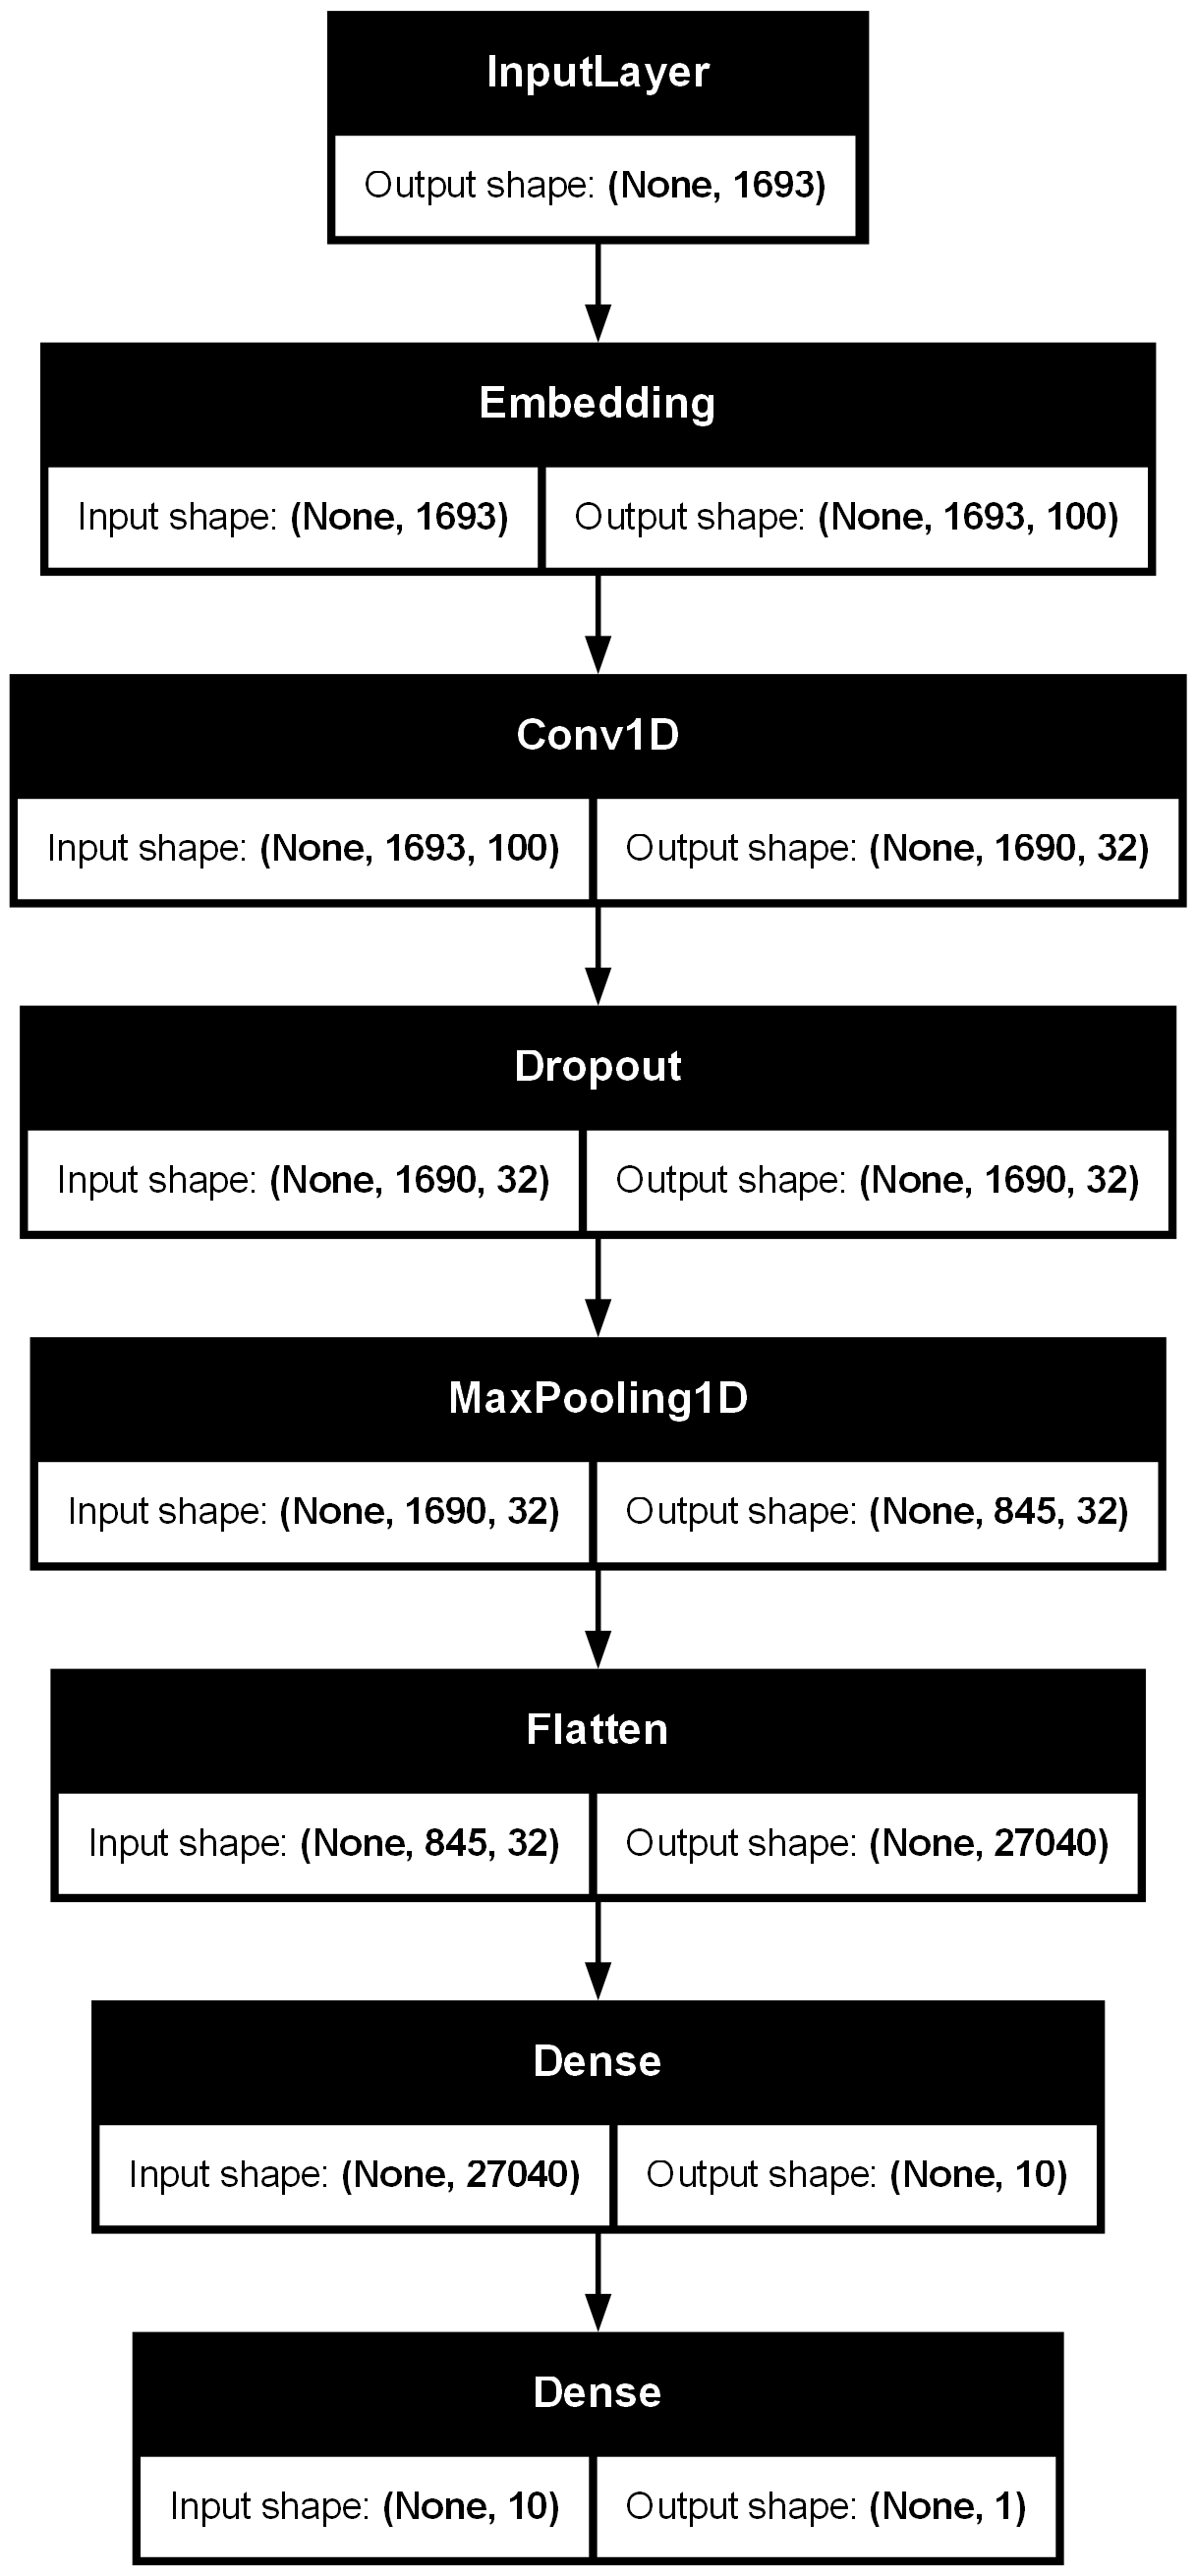

In [166]:
plot_model(model,show_shapes=True)

In [171]:
from tensorflow.keras.models import load_model
model=load_model('txt_ai.h5')

In [173]:
with open ('token.text','rb') as f:
    tokenizer=pickle.load(f)

In [175]:
tokenizer.w

{'film': 1,
 'nt': 2,
 'movie': 3,
 'one': 4,
 'like': 5,
 'even': 6,
 'time': 7,
 'good': 8,
 'would': 9,
 'story': 10,
 'much': 11,
 'character': 12,
 'also': 13,
 'get': 14,
 'characters': 15,
 'two': 16,
 'first': 17,
 'see': 18,
 'well': 19,
 'way': 20,
 'could': 21,
 'make': 22,
 'really': 23,
 'films': 24,
 'life': 25,
 'little': 26,
 'plot': 27,
 'people': 28,
 'scene': 29,
 'never': 30,
 'bad': 31,
 'man': 32,
 'best': 33,
 'new': 34,
 'many': 35,
 'scenes': 36,
 'movies': 37,
 'know': 38,
 'great': 39,
 'another': 40,
 'love': 41,
 'go': 42,
 'director': 43,
 'us': 44,
 'back': 45,
 'action': 46,
 'something': 47,
 'still': 48,
 'end': 49,
 'seems': 50,
 'world': 51,
 'made': 52,
 'work': 53,
 'makes': 54,
 'big': 55,
 'however': 56,
 'though': 57,
 'seen': 58,
 'every': 59,
 'take': 60,
 'around': 61,
 'audience': 62,
 'enough': 63,
 'better': 64,
 'going': 65,
 'performance': 66,
 'things': 67,
 'real': 68,
 'gets': 69,
 'think': 70,
 'years': 71,
 'role': 72,
 'funny': 73,

In [ ]:
model.predict()